## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection and Analysis

In [2]:
diabetes_dataset = pd.read_csv('D:/ML/diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Number of Rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
# Statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## 0 - Non Diabetic
## 1 - Diabetic

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Exploratory Data Analysis
## Univariate Analysis

C:\Users\Eshan Lekamge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


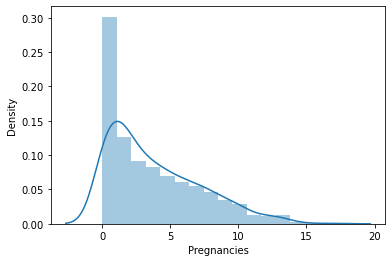

In [10]:
sns_plot = sns.distplot(diabetes_dataset["Pregnancies"])

C:\Users\Eshan Lekamge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


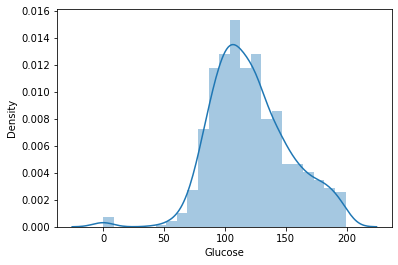

In [11]:
sns_plot = sns.distplot(diabetes_dataset["Glucose"])

C:\Users\Eshan Lekamge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


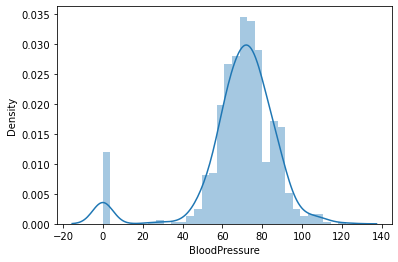

In [12]:
sns_plot = sns.distplot(diabetes_dataset["BloodPressure"])

C:\Users\Eshan Lekamge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


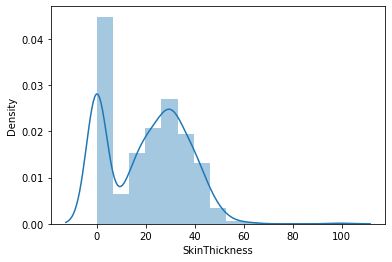

In [13]:
sns_plot = sns.distplot(diabetes_dataset["SkinThickness"])

C:\Users\Eshan Lekamge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


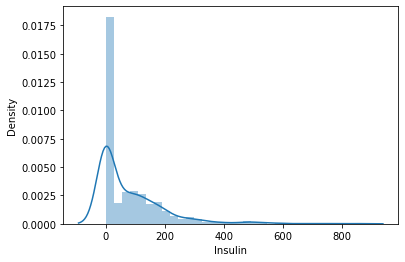

In [14]:
sns_plot = sns.distplot(diabetes_dataset["Insulin"])

C:\Users\Eshan Lekamge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


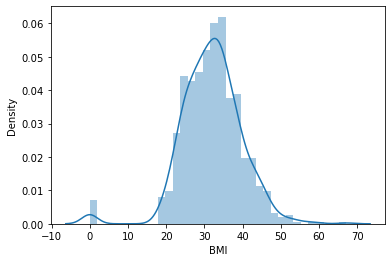

In [15]:
sns_plot = sns.distplot(diabetes_dataset["BMI"])

C:\Users\Eshan Lekamge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


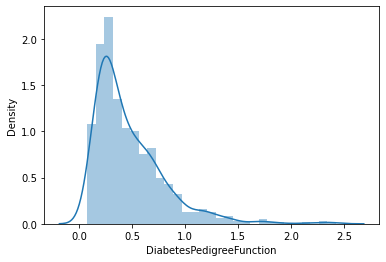

In [16]:
sns_plot = sns.distplot(diabetes_dataset["DiabetesPedigreeFunction"])

C:\Users\Eshan Lekamge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


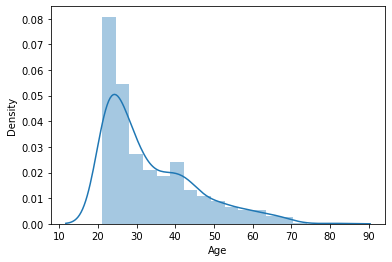

In [17]:
sns_plot = sns.distplot(diabetes_dataset["Age"])

## Bivariate Analysis

Text(0, 0.5, 'Glucose Amount')

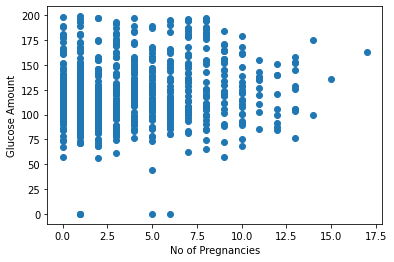

In [22]:
plt.scatter(diabetes_dataset['Pregnancies'],diabetes_dataset['Glucose'])
plt.xlabel("No of Pregnancies")
plt.ylabel("Glucose Amount")

Text(0, 0.5, 'Outcome')

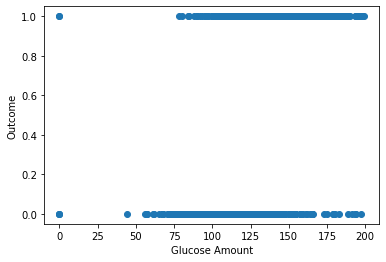

In [21]:
plt.scatter(diabetes_dataset['Glucose'],diabetes_dataset['Outcome'])
plt.xlabel("Glucose Amount")
plt.ylabel("Outcome")

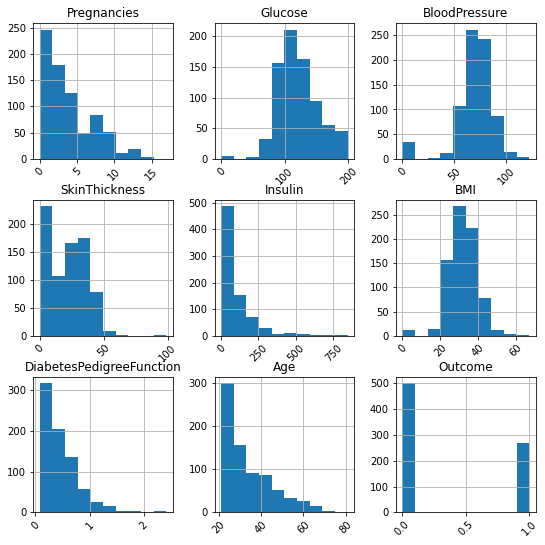

In [25]:
diabetes_dataset.hist(figsize=(9,9), xrot=45)
plt.show()

In [27]:
corr = diabetes_dataset.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


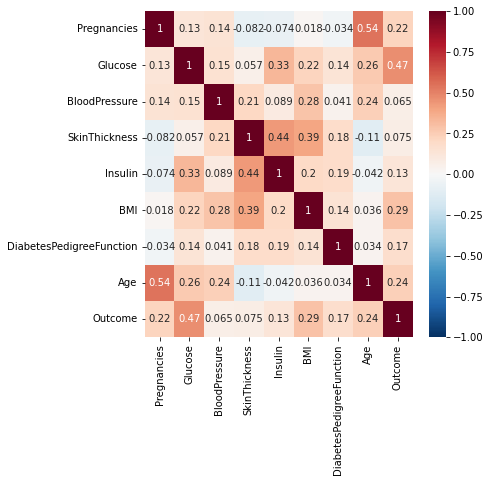

In [28]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

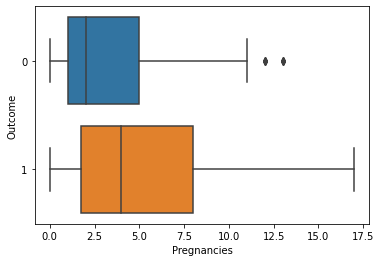

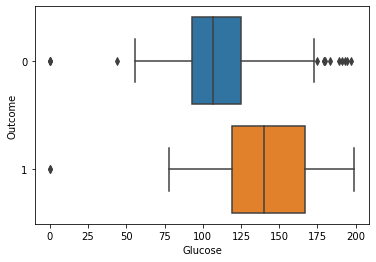

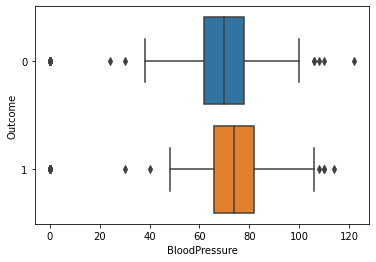

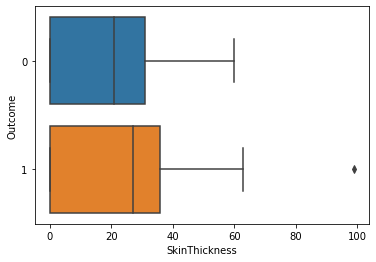

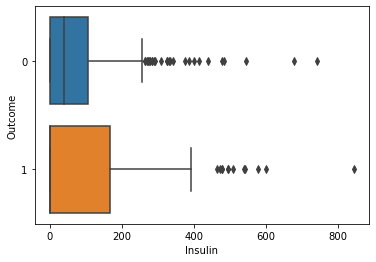

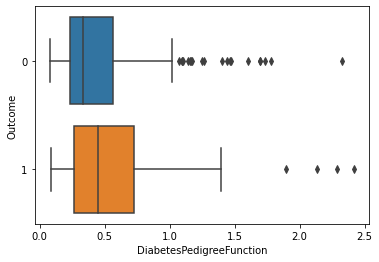

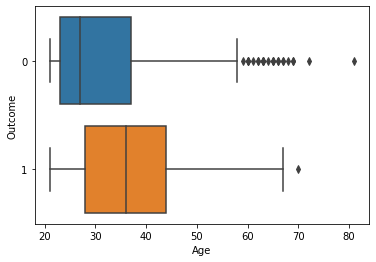

In [30]:
num_cols = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
for col in num_cols:
    sns.boxplot(y = diabetes_dataset['Outcome'].astype('category'), x = col, data=diabetes_dataset)
    plt.show()

## Independent and Dependent features

In [32]:
x = diabetes_dataset.drop(columns = 'Outcome', axis=1)
y = diabetes_dataset['Outcome']

In [33]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [34]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## Standardize the dataset

In [36]:
scaler = StandardScaler()

In [37]:
X_train=scaler.fit_transform(X_train)

In [38]:
X_test=scaler.transform(X_test)

In [39]:
X_train

array([[-0.8362943 , -0.80005088, -0.53576428, ..., -1.06015343,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365, ...,  0.64646721,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566, ...,  1.35537117,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.6143464 ,  0.90248622, ...,  1.78859026,
         1.94892066,  0.42190587],
       [-1.14304979,  0.62368349, -3.8548039 , ...,  1.36849903,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.12847154,  1.45565949, ..., -1.24394334,
        -0.60836445, -1.03426754]])

In [40]:
X_test

array([[ 0.69748316, -0.70719864, -0.64639893, ...,  0.26575953,
        -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563, ...,  0.488933  ,
        -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, ..., -0.1543317 ,
        -0.91266382, -1.03426754],
       ...,
       [-1.14304979,  0.19037303,  0.57058226, ...,  0.56770011,
         0.97750343, -0.86295302],
       [ 0.69748316, -0.49054341,  0.01740899, ..., -0.1543317 ,
        -1.01799822,  0.33624861],
       [ 0.39072767, -1.35716433,  0.68121692, ...,  0.50206085,
        -0.91851573,  0.16493409]])

## Model Training

In [41]:
classifier = svm.SVC(kernel='linear')

In [42]:
# Tranining the support vector classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Model Evaluation
## Accuracy Score

In [44]:
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [47]:
print('Accuracy score of the training data :', training_data_accuracy)

Accuracy score of the training data : 0.7821229050279329


In [48]:
# Accuracy score on the testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [49]:
print('Accuracy score of the testing data :', testing_data_accuracy)

Accuracy score of the testing data : 0.7489177489177489


## New Data Prediction

In [59]:
newdata = diabetes_dataset.drop(columns = 'Outcome', axis=1)
newdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [60]:
## transformation of new data
scaler.transform(newdata.head(1))

array([[ 0.69748316,  0.84033873,  0.12804365,  0.94130925, -0.6936878 ,
         0.21324813,  0.45960931,  1.44979298]])

In [62]:
classifier.predict(scaler.transform(newdata.head(1)))

array([1], dtype=int64)

# 1 = Diabetic

## Pickling The Model file For Deployment

In [63]:
import pickle

In [64]:
pickle.dump(classifier,open('svmClassifier.pkl','wb'))

In [65]:
pickle_model=pickle.load(open('svmClassifier.pkl','rb'))

In [66]:
pickle_model.predict(scaler.transform(newdata.head(1)))

array([1], dtype=int64)

In [68]:
pickle.dump(scaler,open('DiabetesScaler.pkl','wb'))